In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, butter, filtfilt
import serial

# Filtro FIR

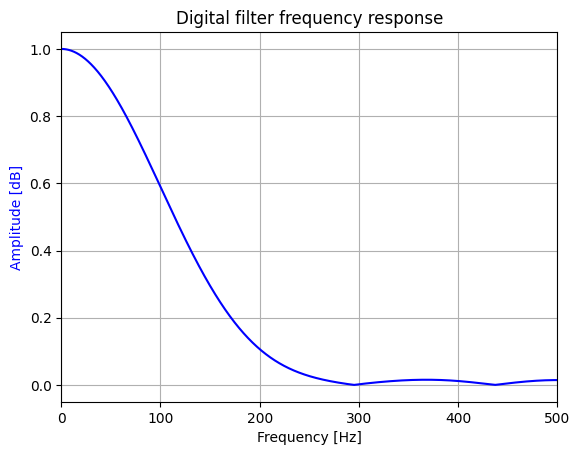

In [4]:
# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = 50 # Desired cutoff frequency, Hz
trans_width = 5 # Width of transition from pass band to stop band, Hz
numtaps = 9 # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


In [5]:
for val in taps:
    print(f"{val},")

0.014407925284062201,
0.0438627666677571,
0.12021193169441212,
0.2025343520793387,
0.2379660485488598,
0.2025343520793387,
0.12021193169441212,
0.0438627666677571,
0.014407925284062201,


# Filtro IIR

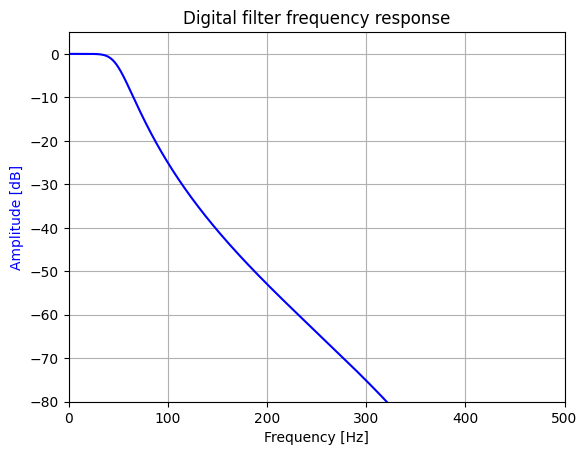

In [17]:
# Filter specifications
fs = 1000 # Sample rate, Hz
cutoff = 50 # Cutoff frequency, Hz
order = 4 # Filter order

# Compute the filter coefficients using the Butterworth filter design function
b, a = butter(order, cutoff/(0.5*fs), btype='low')

# Compute the frequency response of the filter
w, h = freqz(b, a, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

In [18]:
print("Polos")
for val in a:
    print(f"{val},")

Polos
1.0,
-3.180638548874719,
3.8611943489942133,
-2.112155355110969,
0.43826514226197977,


In [19]:
print("Ceros")
for val in b:
    print(f"{val},")

Ceros
0.00041659920440659937,
0.0016663968176263975,
0.002499595226439596,
0.0016663968176263975,
0.00041659920440659937,


# Prueba FIR

In [69]:
puerto = serial.Serial('/dev/ttyACM0', 9600)

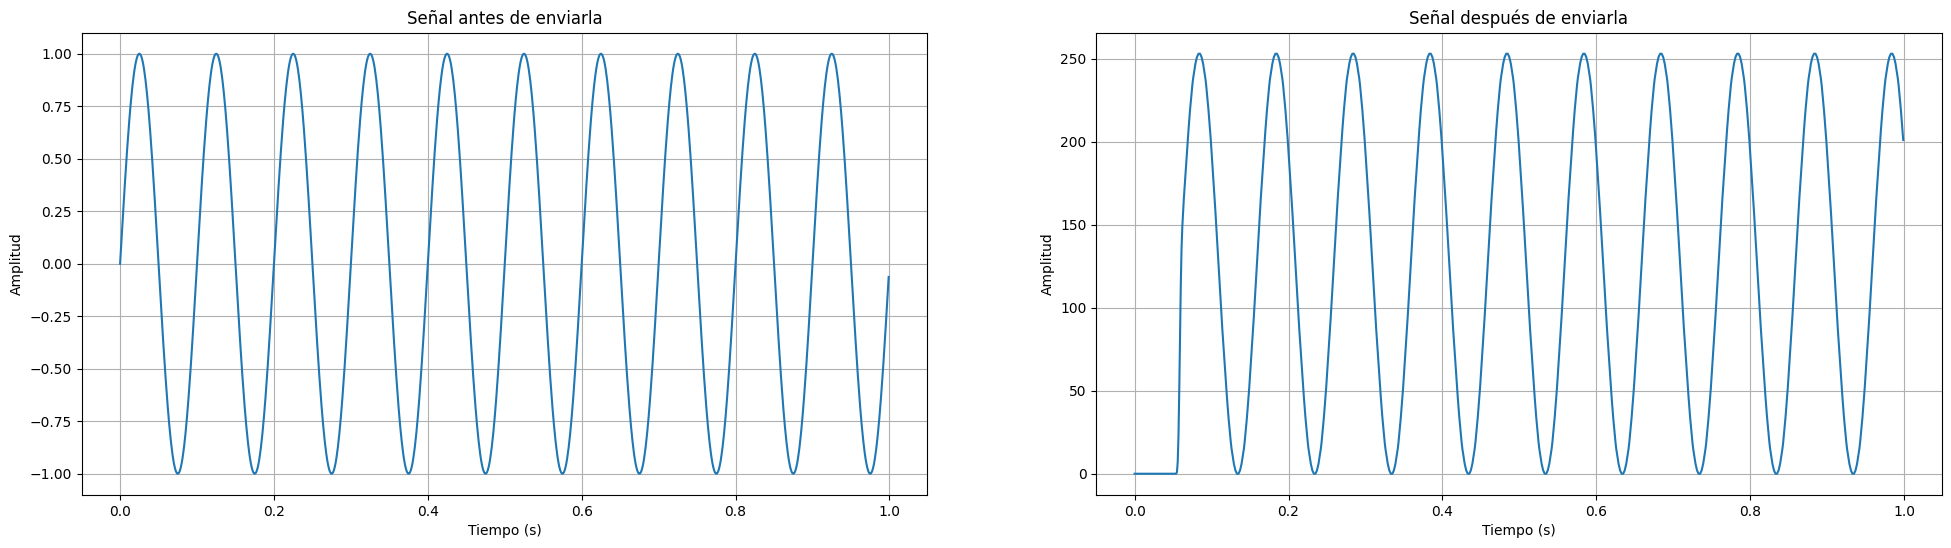

In [71]:
# Generar la señal (por ejemplo, una señal sinusoidal)
fs = 1000  # Frecuencia de muestreo en Hz
f = 10     # Frecuencia de la señal en Hz
tiempo = 1
t = np.arange(0, tiempo, 1/fs)  # Vector de tiempo de 1 segundo de duración
signal = np.sin(2 * np.pi * f * t)  # Señal sinusoidal
#signal = np.sign(np.sin(2 * np.pi * f * t)) # señal cuadrada

res = np.zeros(signal.shape[0])

i = 0
for sample in signal:
    sample_int = int((sample + 1) * 127.5)
    puerto.write(bytes([sample_int]))
    byte = puerto.read(1)
    res[i] = int.from_bytes(byte, byteorder='big', signed=False)
    i += 1

# Definir la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(24, 6))

# Graficar la señal antes de enviarla
axs[0].plot(t, signal)
axs[0].set_title('Señal antes de enviarla')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

# Graficar la señal después de enviarla
axs[1].plot(t, res)
axs[1].set_title('Señal después de enviarla')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)

# Mostrar la figura
plt.show()

In [72]:
# Es necesario cerrar el puerto para poder subir nuevo codigo
puerto.close()

# Prueba IIR

In [73]:
puerto = serial.Serial('/dev/ttyACM0', 9600)

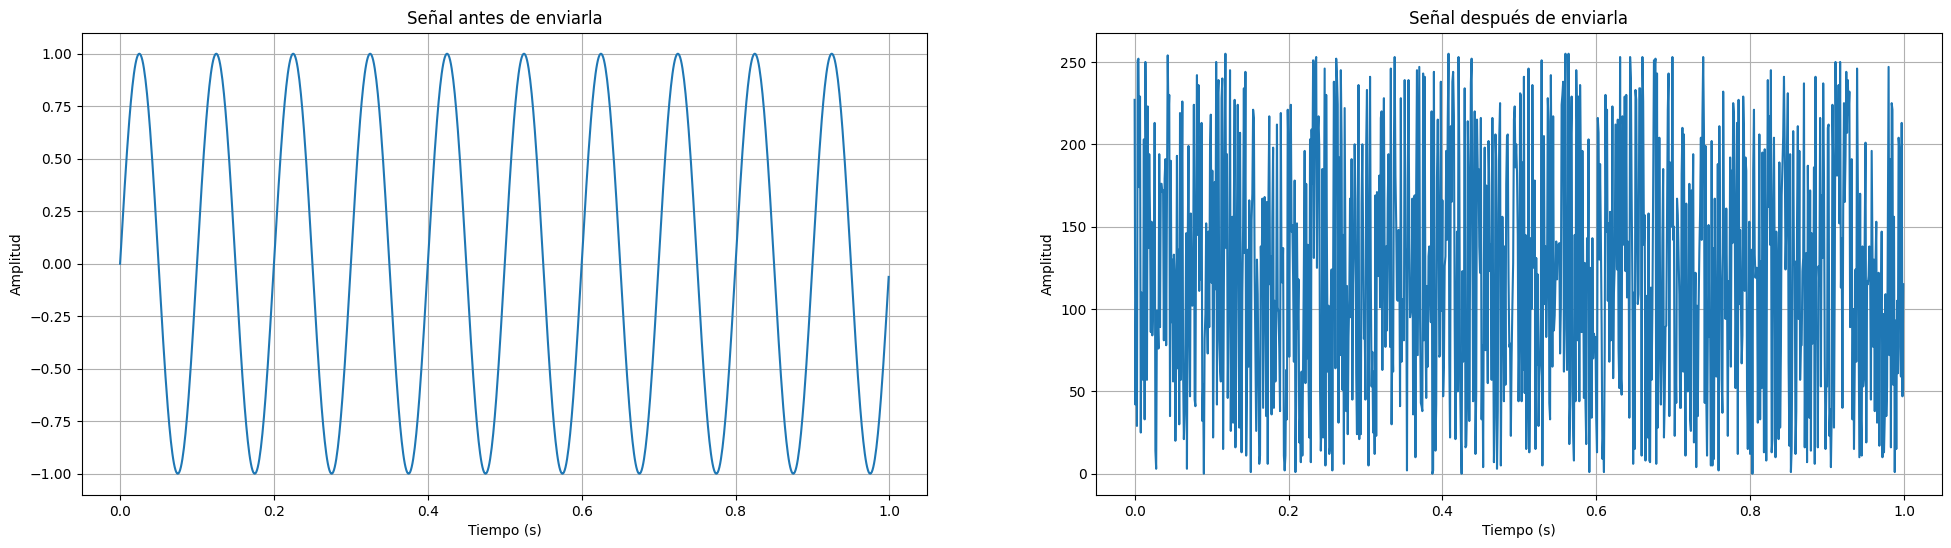

In [76]:
# Generar la señal (por ejemplo, una señal sinusoidal)
fs = 1000  # Frecuencia de muestreo en Hz
f = 10     # Frecuencia de la señal en Hz
tiempo = 1
t = np.arange(0, tiempo, 1/fs)  # Vector de tiempo de 1 segundo de duración
signal = np.sin(2 * np.pi * f * t)  # Señal sinusoidal
#signal = np.sign(np.sin(2 * np.pi * f * t)) # señal cuadrada

res = np.zeros(signal.shape[0])

i = 0
for sample in signal:
    sample_int = int((sample + 1) * 127.5)
    puerto.write(bytes([sample_int]))
    byte = puerto.read(1)
    res[i] = int.from_bytes(byte, byteorder='big', signed=False)
    i += 1

# Definir la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(24, 6))

# Graficar la señal antes de enviarla
axs[0].plot(t, signal)
axs[0].set_title('Señal antes de enviarla')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

# Graficar la señal después de enviarla
axs[1].plot(t, res)
axs[1].set_title('Señal después de enviarla')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)

# Mostrar la figura
plt.show()

In [60]:
# Es necesario cerrar el puerto para poder subir nuevo codigo
puerto.close()